
# Situation
A food-focused e-commerce platform aims to streamline its operations by targeting a niche customer segment, particularly those involved in the culinary industry. Their goal is to enhance product and service offerings through tailored promotions, ultimately driving sales. The dataset for analysis comprises over 2 million customer transaction records and includes the following attributes.

* fecha_compra: Date of the purchase made by the customer.
* customer_id: Customer identification.
* product_id: Product identification.
* type_id: Tipo de negocio Type of business (GA: Gastronomy, PA: Baking, BO: Wineries).
* business_id: Code that indicates the type of business to which the business belongs.
* cantidad_venta: Quantity of products purchased.
* monto_venta_transf: Total purchase amount.
* peso_venta_transf: Total volume of the purchase.

# Importing libraries

In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

# Importing data

In [41]:
data = pd.read_csv("train.csv", sep="|")
print(data.shape)
data.head()

(2167848, 9)


,fecha_compra,customer_id,product_id,type_id,business_id,channel_id,cantidad_venta,monto_venta_transf,peso_venta_transf
0,2022-01-31,7157,510,BO,21,V,1.0,0.153431,0.005211
1,2022-01-31,7157,512,BO,21,V,1.0,0.153431,0.005211
2,2022-01-31,9382,510,BO,21,V,1.0,0.153431,0.005211
3,2022-01-31,9382,512,BO,21,V,1.0,0.153431,0.005211
4,2022-01-31,9382,525,BO,21,V,1.0,0.153431,0.005790


In [42]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167848 entries, 0 to 2167847
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   fecha_compra        object 
 1   customer_id         int64  
 2   product_id          int64  
 3   type_id             object 
 4   business_id         int64  
 5   channel_id          object 
 6   cantidad_venta      float64
 7   monto_venta_transf  float64
 8   peso_venta_transf   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 148.9+ MB
None
(2167848, 9)


# Exploratory Data Analysis (EDA)

### Data Cleaning

In [44]:
#Droping duplicates
print("Shape antes de borrar dublicados", data.shape)
data = data.drop_duplicates()
print("Shape después de borrar dublicados", data.shape)

Shape antes de borrar dublicados (2167848, 9)
Shape después de borrar dublicados (2167848, 9)


In [45]:
# Count of unique values
for col in ["customer_id","product_id","type_id","business_id", "channel_id"]:
    print("Unique Values for ", col, " - ", data[col].nunique())

Data Shape (2167848, 9)
Unique Values for  customer_id  -  15312
Unique Values for  product_id  -  1043
Unique Values for  type_id  -  3
Unique Values for  business_id  -  10
Unique Values for  channel_id  -  3


In [46]:
# Unique values for each column
valores_unicos1 = data["type_id"].unique()
valores_unicos2 = data["business_id"].unique()
valores_unicos3 = data["channel_id"].unique()
valores_unicos4 = data["cantidad_venta"].unique()
print("type_id  ",valores_unicos1)
print("business_id  ",valores_unicos2)
print("channel_id  ",valores_unicos3)
print("cantidad_venta  ",valores_unicos4)

type_id   ['BO' 'GA' 'PA']
business_id   [21 51 52 22 54 31 71 61 32 70]
channel_id   ['V' 'B' 'A']
cantidad_venta   [  1.   2.  12.   3.  24.  25.   4.   5.   6.  40.  36.   7.   8.  30.
  10.   9.  11.  48. 120.  60.  20.  16.  14.  13.  18.  23.  21.  15.
  72.  96.  17.  50.  35.  38. 100.  22.  32.  28.  55.  80. 150.  85.
  31.  26. 103.  45.  70.  42.  19. 240.  37. 111. 140.  49.  65. 200.
  56.  46.  27.  53.  29.  90. 480. 125.  62.  39.  95. 130.  52.  41.
  58.  34.  68.  75. 132.  61.  44. 250. 118. 110. 121. 144. 160.  33.
 171.  54.  92. 175.  64.  47.  74.  77.  67. 101.  78.  84.  43.  73.
 107. 119. 143. 180.  51.  71.  66. 170.  86. 225.  88.  76. 203.  57.
 105. 239.  99. 189.  94.  59. 168. 177. 167. 124. 400. 190.  69. 304.
 102. 156. 133. 135. 128.  81. 112. 188. 264. 238. 152.  82. 192. 220.
 193. 136. 300.  98.  97. 116. 108.]


In [47]:
#Quantifying of nulls
print(np.sum(data.isnull()), "\n")
print("Percentage of customers missing: ", round(data['customer_id'].isnull().sum() * 100 / len(data),2),"%" )

fecha_compra          0
customer_id           0
product_id            0
type_id               0
business_id           0
channel_id            0
cantidad_venta        0
monto_venta_transf    0
peso_venta_transf     0
dtype: int64 

Percentage of customers missing:  0.0 %


In [48]:
#Identifiying the date range of transactions
data["fecha_compra"] = pd.to_datetime(data["fecha_compra"],format='%Y-%m-%d')
print("Minima fecha compra", min(data["fecha_compra"]))
print("Maxima fecha compra", max(data["fecha_compra"]))
data.head()

Minima fecha compra 2022-01-31 00:00:00
Maxima fecha compra 2023-02-04 00:00:00


,fecha_compra,customer_id,product_id,type_id,business_id,channel_id,cantidad_venta,monto_venta_transf,peso_venta_transf
0,2022-01-31,7157,510,BO,21,V,1.0,0.153431,0.005211
1,2022-01-31,7157,512,BO,21,V,1.0,0.153431,0.005211
2,2022-01-31,9382,510,BO,21,V,1.0,0.153431,0.005211
3,2022-01-31,9382,512,BO,21,V,1.0,0.153431,0.005211
4,2022-01-31,9382,525,BO,21,V,1.0,0.153431,0.005790


In [50]:
#Identifying maximum and minimum sales amount
print(("Total monto_venta", sum(data["monto_venta_transf"])))
print("Minimo monto_venta", min(data["monto_venta_transf"]))
print("Maximo monto_venta", max(data["monto_venta_transf"]))
data["monto_venta_transf"].describe()
data[data.monto_venta_transf<0]

('Total monto_venta', 58064279.91256283)
Minimo monto_venta 0.0231593241400669
Maximo monto_venta 16854.461580245836


,fecha_compra,customer_id,product_id,type_id,business_id,channel_id,cantidad_venta,monto_venta_transf,peso_venta_transf


### Analysis by Business Type

In [84]:
### Creating groupings at the type_id level to find the count and percentage of unique customers
type_id_df = data.groupby("type_id")["customer_id"].nunique().reset_index()
type_id_df = type_id_df.rename(columns = {"customer_id":"count_customer_id"})
type_id_df["customer_%"] = round(type_id_df["count_customer_id"]*100/type_id_df["count_customer_id"].sum(),2)

print("_____________________RECUENTO Y % DE CLIENTES ÚNICOS_______________")
print("total id_clientes: ",type_id_df["count_customer_id"].sum())
print(type_id_df)

# Creating groupings at type_id level to find total revenue and its percentage
type_id_sales_df = data.groupby("type_id")["monto_venta_transf"].sum().reset_index()
type_id_sales_df = type_id_sales_df.rename(columns = {"monto_venta_transf":"sum_monto_venta_transf"})
type_id_sales_df["monto_venta_transf%"] = round(type_id_sales_df["sum_monto_venta_transf"]*100/type_id_sales_df["sum_monto_venta_transf"].sum(),2)

print("_____________________INGRESOS POR TYPE_ID__________________________")
print("total ingresos: ",type_id_sales_df["sum_monto_venta_transf"].sum())
print(type_id_sales_df)

_____________________RECUENTO Y % DE CLIENTES ÚNICOS_______________
total id_clientes:  15312
  type_id  count_customer_id  customer_%
0      BO               4966       32.43
1      GA               7957       51.97
2      PA               2389       15.60
_____________________INGRESOS POR TYPE_ID__________________________
total ingresos:  58064279.91256283
  type_id  sum_monto_venta_transf  monto_venta_transf%
0      BO            7.753235e+06                13.35
1      GA            3.124422e+07                53.81
2      PA            1.906682e+07                32.84


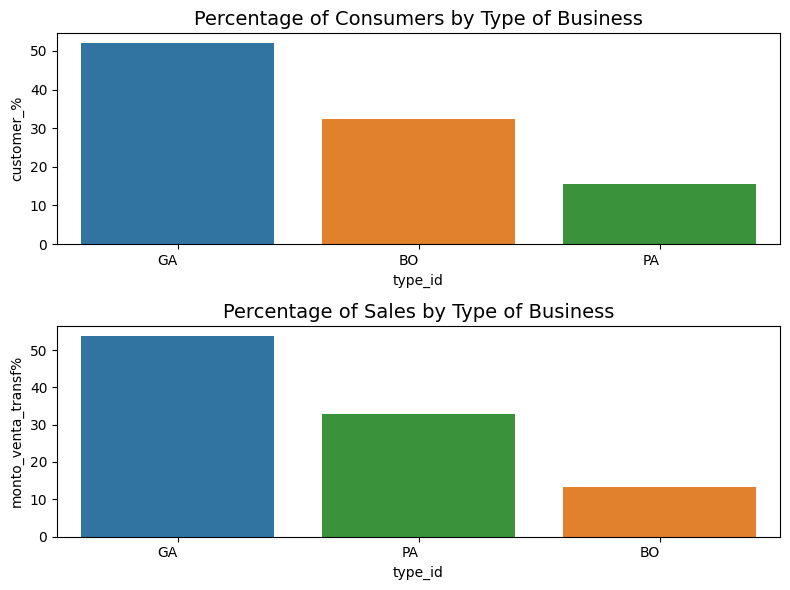

In [91]:
#Visualizing Consumers and Sales by Type of Business
type_id_df = type_id_df.sort_values(by="customer_%", ascending=False)
type_id_sales_df = type_id_sales_df.sort_values(by="monto_venta_transf%", ascending=False)

colors_customers = ['#1f77b4', '#ff7f0e', '#2ca02c']
colors_sales = ['#1f77b4', '#2ca02c', '#ff7f0e']

fig, axes = plt.subplots(2, 1, figsize=(8, 6), dpi=100)

sns.barplot(ax=axes[0], x=type_id_df["type_id"], y=type_id_df['customer_%'], palette=colors_customers)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, ha="right")
axes[0].set_title('Percentage of Consumers by Type of Business', fontsize=14)

sns.barplot(ax=axes[1], x=type_id_sales_df["type_id"], y=type_id_sales_df['monto_venta_transf%'], palette=colors_sales)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0, ha="right")
axes[1].set_title('Percentage of Sales by Type of Business', fontsize=14)

plt.tight_layout()
plt.show()


The type of business that has the most consumers is gastronomy and it is also the type of business that generates the greatest amount of sales
on the web and represents more than 50% of total sales, compared to the bakery and winery business.

### Extracting gastronomic customers

The goal is to refine sales strategies and enhance product personalization for culinary customers through customer segmentation using an unsupervised learning algorithm. As the data is already clean, we focus solely on extracting data where type_id == GA.

In [107]:
#from pandas._libs.tslibs.offsets import MonthOffset
GA_df = data[data.type_id  == "GA"]
GA_df['fecha_compra_2'] = GA_df['fecha_compra']
GA_df

,fecha_compra,customer_id,product_id,type_id,business_id,channel_id,cantidad_venta,monto_venta_transf,peso_venta_transf,fecha_compra_2
24,2022-01-31,3643,494,GA,51,B,1.0,0.277912,0.289492,2022-01-31
25,2022-01-31,4799,632,GA,52,B,1.0,0.283702,0.017659,2022-01-31
36,2022-01-31,8082,354,GA,21,B,2.0,0.361864,0.144746,2022-01-31
77,2022-01-31,8660,494,GA,51,V,2.0,0.558719,0.578983,2022-01-31
98,2022-01-31,4799,443,GA,21,B,2.0,0.654251,0.144746,2022-01-31
...,...,...,...,...,...,...,...,...,...,...
2167818,2023-02-04,10820,37,GA,51,V,20.0,798.582710,95.410626,2023-02-04
2167819,2023-02-04,10776,38,GA,51,B,25.0,957.438304,119.263282,2023-02-04
2167821,2023-02-04,10776,37,GA,51,B,25.0,998.224769,119.263282,2023-02-04
2167845,2023-02-04,3111,673,GA,31,B,64.0,2460.348170,926.372966,2023-02-04


# RFM Segmentation

### Date selection for the analysis

In [171]:
#Getting the RFM analysis date
analysis_date = GA_df["fecha_compra"].max() + pd.DateOffset(1)
print("RFM analysis date :", analysis_date)

#Getting the start date when taking 1 year data
start_date = analysis_date - pd.DateOffset(days = 365)
print("Start date when taking 1 year data :", start_date)


RFM analysis date : 2023-02-05 00:00:00
Start date when taking 1 year data : 2022-02-05 00:00:00


In [109]:
#Agragating data at client level to get RFM values
data_rfm = GA_df[GA_df.fecha_compra >= start_date].groupby(['customer_id'],as_index=False).agg({'fecha_compra': lambda x: (analysis_date - x.max()).days,
'fecha_compra_2': 'nunique','monto_venta_transf': 'sum'})
data_rfm = data_rfm.rename(columns = {'fecha_compra': 'Recency','fecha_compra_2': 'Frecuency','monto_venta_transf': 'Monetary'})
print(data_rfm.shape)
data_rfm.head()

(7957, 4)


,customer_id,Recency,Frecuency,Monetary
0,28,3,43,1700.982880
1,47,5,52,3607.047365
2,48,12,14,3746.446232
3,52,40,15,1048.732360
4,62,19,18,665.949261


### Obtaining the RFM score per client

In [118]:
### Getting individual RFM scores by using quantiles for each of the columns
data_rfm['R_score'] = pd.qcut(data_rfm['Recency'], 4, labels=False)
data_rfm['F_score'] = pd.qcut(data_rfm['Frecuency'], 4, labels=False)
data_rfm['M_score'] = pd.qcut(data_rfm['Monetary'], 4, labels=False)

### Since a low Recency score means recent transactions and good customer, changing quantile values
### So that low values rank highest and vice versa
data_rfm['R_score'] = 3 - data_rfm['R_score']

data_rfm['RFM'] = data_rfm.R_score.map(str) + data_rfm.F_score.map(str) + data_rfm.M_score.map(str)

### Calculating Final RFM score
data_rfm["RFM_Score"] = data_rfm['R_score'] + data_rfm['F_score'] + data_rfm['M_score']
data_rfm.head(10)

,customer_id,Recency,Frecuency,Monetary,R_score,F_score,M_score,RFM,RFM_Score
0,28,3,43,1700.982880,3,3,2,332,8
1,47,5,52,3607.047365,2,3,2,232,7
2,48,12,14,3746.446232,1,1,2,112,4
3,52,40,15,1048.732360,0,1,1,011,2
4,62,19,18,665.949261,0,1,1,011,2
5,69,5,47,2969.815667,2,3,2,232,7
6,71,3,44,5207.871958,3,3,3,333,9
7,80,1,58,5002.816408,3,3,3,333,9
8,91,12,32,826.547594,1,2,1,121,4
9,106,10,7,4016.860291,1,0,3,103,4


# K-MEANS CLUSTERIZATION

### Normalizing

<Axes: xlabel='Monetary', ylabel='Density'>

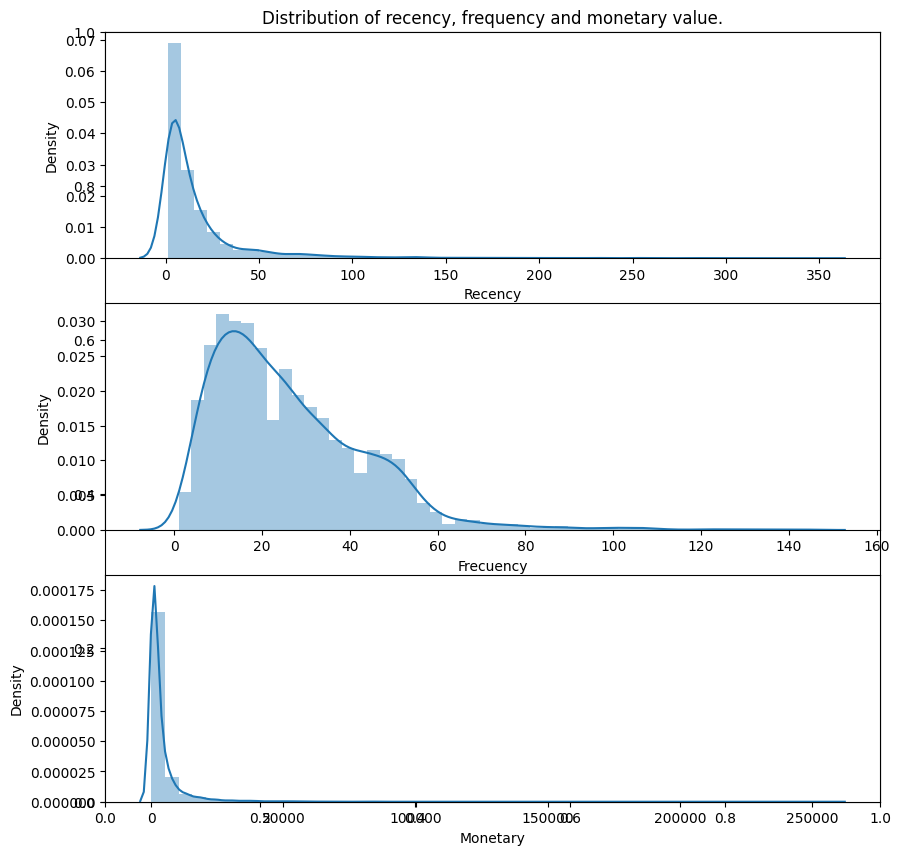

In [122]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(10,10))
plt.title('Distribution of recency, frequency and monetary value.')

plt.subplot(3, 1, 1); sns.distplot(data_rfm['Recency'])
plt.subplot(3, 1, 2); sns.distplot(data_rfm['Frecuency'])
plt.subplot(3, 1, 3); sns.distplot(data_rfm['Monetary'])

All variables are skewed to the right. Therefore, since clustering algorithms require a normal distribution, data normalization will be performed using logarithmic transformation in order to address data skewness.

<Axes: xlabel='log_M', ylabel='Density'>

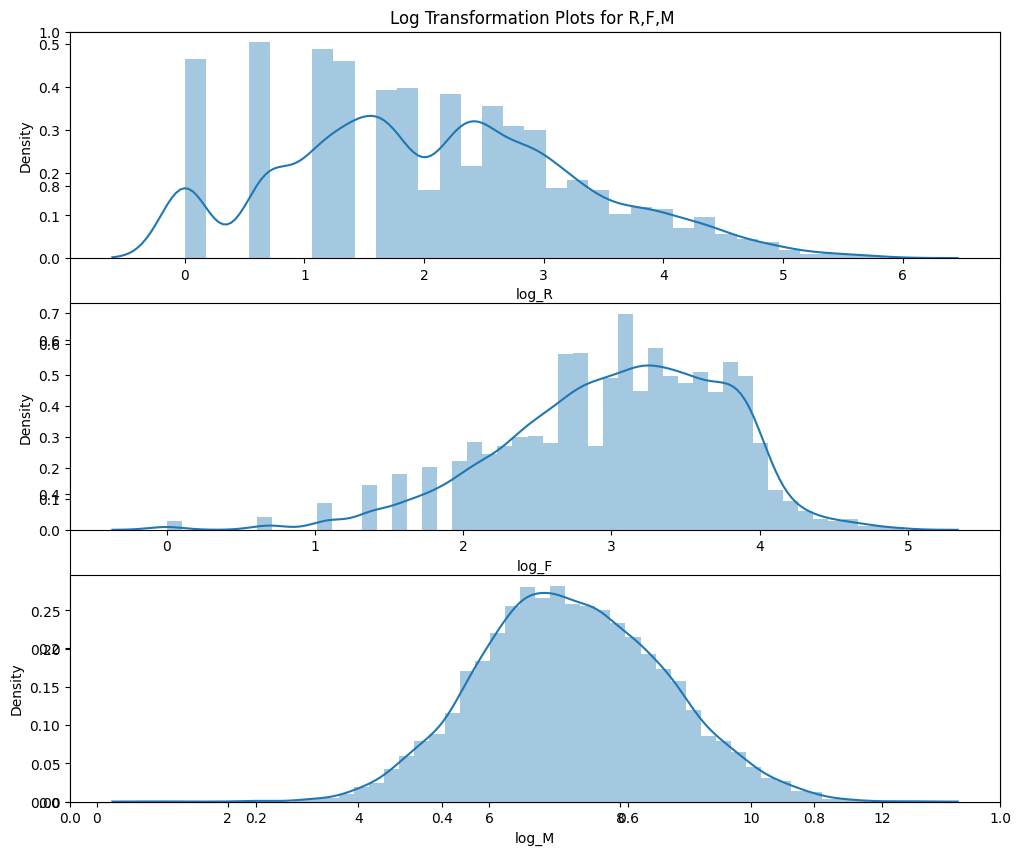

In [128]:
# Taking Log of columns
data_rfm["log_R"] = np.log(data_rfm.Recency)
data_rfm["log_F"] = np.log(data_rfm.Frecuency)
data_rfm["log_M"] = np.log(data_rfm.Monetary)

# Checking the distribution of Recency, Frequency and Monetary variables after log transformation
plt.figure(figsize=(12,10))
plt.title('Log Transformation Plots for R,F,M ')
plt.subplot(3, 1, 1)
sns.distplot(data_rfm['log_R'])
plt.subplot(3, 1, 2)
sns.distplot(data_rfm['log_F'])
plt.subplot(3, 1, 3)
sns.distplot(data_rfm['log_M'])

The distribution of recency, frequency and monetary value is shown after having performed the logarithmic transformation. In such a way, it is observed that the distribution of the variables is no longer skewed to the right and k-means can now be applied.

### Elbow Method

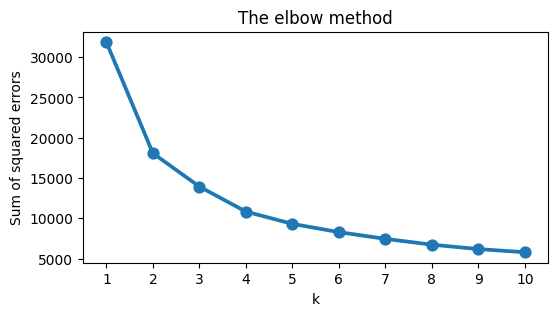

In [172]:
### Features Used in training K Means - Log Transformed Recency, Frequency and Monetary values
data_norm = data_rfm[["log_R", "log_F", "log_M"]]

sse = {}
# Fit KMeans and calculate SSE for each k

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_norm)

    # Assigning sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

plt.figure(figsize=(6,3))
plt.title('The elbow method')
plt.xlabel('k');
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

The figure shows that the most suitable number of segments can be taken as 3. Now, k-means can be applied using 3 clusters

In [134]:
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, random_state=1)
kmeans.fit(data_norm)
data_rfm["cluster"] = kmeans.predict(data_norm)

#Getting the average for each cluster
data_rfm.groupby(["cluster"])[['Recency','Frecuency', 'Monetary']].mean()

,Recency,Frecuency,Monetary
cluster,,,
0,36.647179,13.748376,788.754272
1,4.250099,27.132406,1259.963049
2,8.978943,39.930870,10054.602967


By applying k-means for 3 clusters, the mean value for each cluster in the figure above shows that the higher the frequency, the higher the monetary value. This can also be seen in the following heat map.

<Axes: >

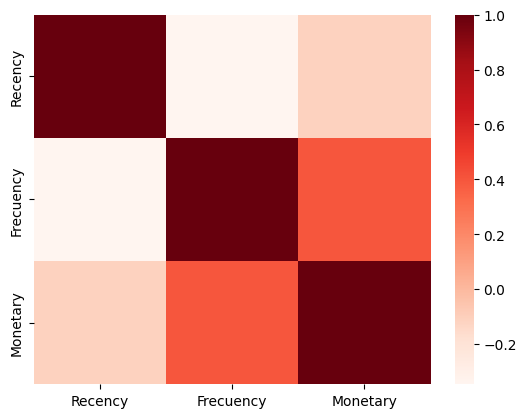

In [136]:
#Plotting the heat map
sns.heatmap(data_rfm[['Recency','Frecuency', 'Monetary']].corr(),cmap="Reds")

The heat map reveals a strong positive correlation between frequency and monetary value, surpassing the correlation between recency-frequency and recency-monetary. While the clustering algorithm could be trained solely on frequency and monetary value, we'll incorporate all three variables for comprehensive analysis.

### Visualizing the clusters

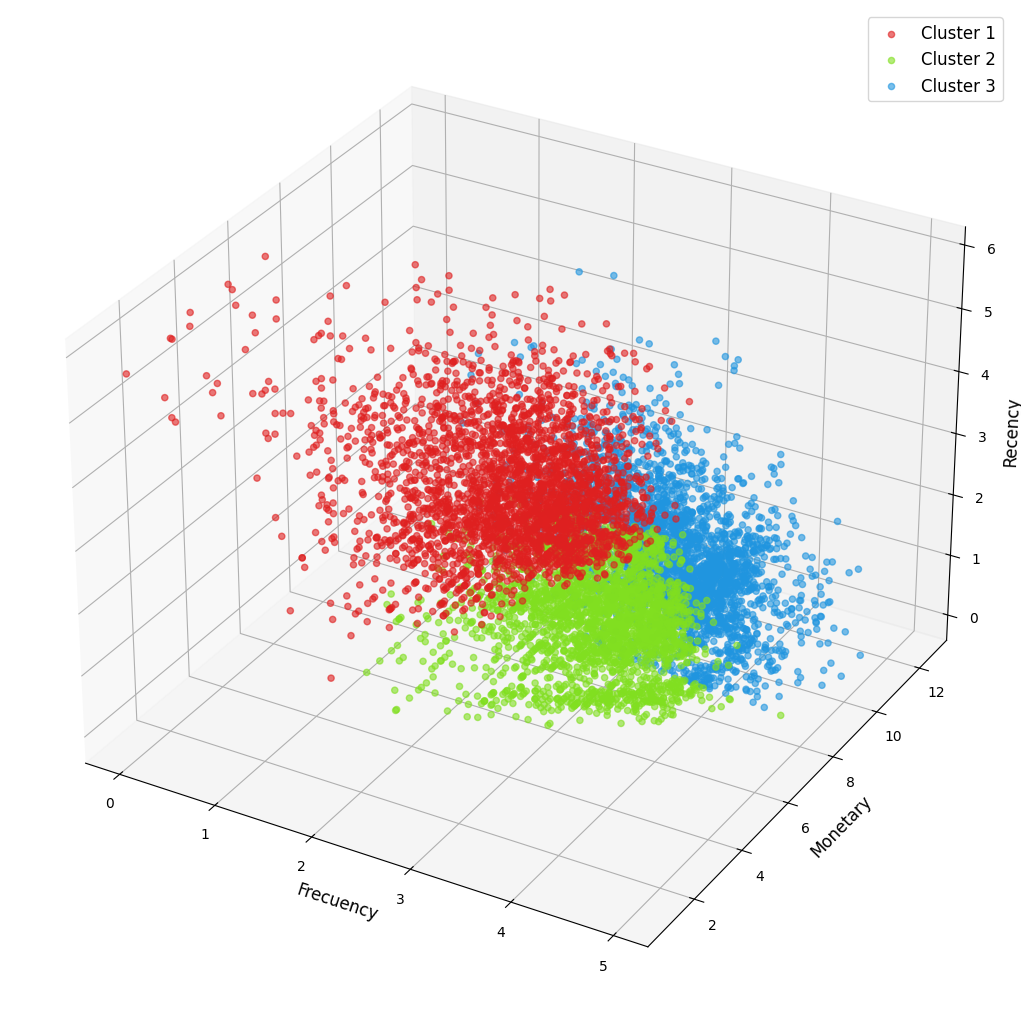

In [166]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Getting the coordinates of the centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
cen_z = [i[2] for i in centroids]

# Adding to DataFrame
data_rfm['cen_x'] = data_rfm.cluster.map({0: cen_x[0], 1: cen_x[1], 2: cen_x[2]})
data_rfm['cen_y'] = data_rfm.cluster.map({0: cen_y[0], 1: cen_y[1], 2: cen_y[2]})
data_rfm['cen_z'] = data_rfm.cluster.map({0: cen_z[0], 1: cen_z[1], 2: cen_z[2]})

# Defining colors and creating the figure
colors = ['#DF2020', '#81DF20', '#2095DF']
data_rfm['c'] = data_rfm.cluster.map({0: colors[0], 1: colors[1], 2: colors[2]})
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')

# Plotting clusters in 3D
for cluster_id in range(len(centroids)):
    cluster_data = data_rfm[data_rfm['cluster'] == cluster_id]
    ax.scatter(cluster_data['log_F'], cluster_data['log_M'], cluster_data['log_R'], c=colors[cluster_id], alpha=0.6, s=20, label=f'Cluster {cluster_id+1}')

ax.set_xlabel('Frecuency', fontsize=12)
ax.set_ylabel('Monetary', fontsize=12)
ax.set_zlabel('Recency', fontsize=12)
ax.legend(fontsize=12)
plt.show()



The graph depicts clusters labeled by color. Green indicates high-sales customers with frequent purchases and recent activity. Blue represents customers with low frequency, low recency, and moderate spending. Red signifies medium-frequency customers with high spending but low recent activity.

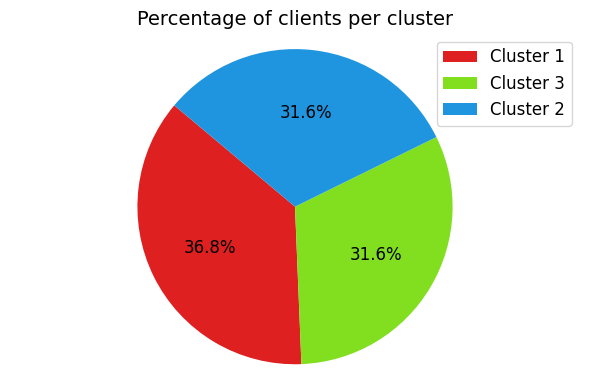

In [170]:
# Visualizing the percentage of gastronomic clients by cluster
cluster_counts = data_rfm['cluster'].value_counts(normalize=True) * 100

# Renaming and defining colors
cluster_counts.index = [f'Cluster {i+1}' for i in cluster_counts.index]
colors = ['#DF2020', '#81DF20', '#2095DF']

# Setting the pie chart
plt.figure(figsize=(6, 4))
patches, texts, autotexts = plt.pie(cluster_counts, autopct='%1.1f%%', startangle=140, colors=colors)

# Customize text in the sectors
for text, autotext in zip(texts, autotexts): 
    text.set_fontsize(12)
    autotext.set_fontsize(12)

plt.legend(patches, cluster_counts.index, loc="upper right", fontsize=12)
plt.title('Percentage of clients per cluster', fontsize=14)
plt.axis('equal') 
plt.tight_layout()
plt.show()


The pie chart shows a relatively equal distribution of customers across three clusters

### Sales Strategies 

Cluster 1 - Active High Value Customers: Active and valuable customers make frequent, recent and high value purchases. They need personalized service and would benefit from popular products. They prefer quality and are willing to pay more.

Sales strategies:

* Loyalty program with rewards adapted to your needs.
* Personalized emails with exclusive offers and VIP events.

Cluster 2- High Value Potential Customers: Restaurant owners who have purchased little, but need incentives to return. Price-sensitive, they look for competitive offers and would benefit from constant reminders and special discounts.

Sales strategies:

* Personalized emails and WhatsApp messages with discounts.
* Advertising on social networks and recommendations of previous products.

Cluster 3 - Low Value Customers: Customers with low value and less frequent purchases. They are price sensitive and seek affordable quality. They need incentives to shop online and can become valuable customers with discounts and loyalty programs.

Sales strategies:

* Discounts on similar and affordable quality products.
* Loyalty programs with rewards for repeat purchases to increase the value of transactions.